In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
import scipy as sp 
import sklearn 
import seaborn as sns

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


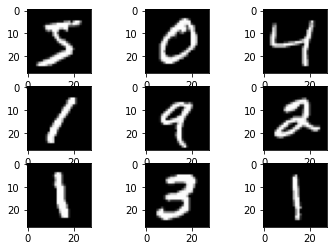

In [ ]:
from matplotlib import pyplot
for n in range(0, 9):
    pyplot.subplot(330 + 1 + n)
    pyplot.imshow(x_train[n], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=True,  
        rotation_range=65, 
        brightness_range=[0.2,1.0],
        zoom_range =[0.5,1.0], 
        width_shift_range=0.5,  
        height_shift_range=0.5,  
        horizontal_flip=True,  
        vertical_flip=True) 

datagen.fit(x_train)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten
from keras.layers import Dense, Dropout
from keras.models import Sequential

model= Sequential()


model.add(Conv2D(64, kernel_size=5,padding='same', activation ="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(32, kernel_size=5,padding='same', activation ="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=5,padding='same',  activation ="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Activation("relu"))

model.add(Dense(512))
model.add(Dropout(0.4))
model.add(Activation("relu"))

model.add(Dense(10,  activation ="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128, verbose=2)

Epoch 1/100
469/469 - 18s - loss: 0.4033 - accuracy: 0.8961 - val_loss: 0.0527 - val_accuracy: 0.9826 - 18s/epoch - 37ms/step
Epoch 2/100
469/469 - 7s - loss: 0.0774 - accuracy: 0.9780 - val_loss: 0.0381 - val_accuracy: 0.9874 - 7s/epoch - 15ms/step
Epoch 3/100
469/469 - 7s - loss: 0.0566 - accuracy: 0.9838 - val_loss: 0.0409 - val_accuracy: 0.9874 - 7s/epoch - 15ms/step
Epoch 4/100
469/469 - 7s - loss: 0.0485 - accuracy: 0.9860 - val_loss: 0.0397 - val_accuracy: 0.9882 - 7s/epoch - 15ms/step
Epoch 5/100
469/469 - 7s - loss: 0.0383 - accuracy: 0.9894 - val_loss: 0.0418 - val_accuracy: 0.9879 - 7s/epoch - 15ms/step
Epoch 6/100
469/469 - 7s - loss: 0.0369 - accuracy: 0.9894 - val_loss: 0.0324 - val_accuracy: 0.9907 - 7s/epoch - 15ms/step
Epoch 7/100
469/469 - 7s - loss: 0.0341 - accuracy: 0.9906 - val_loss: 0.0356 - val_accuracy: 0.9898 - 7s/epoch - 15ms/step
Epoch 8/100
469/469 - 7s - loss: 0.0328 - accuracy: 0.9906 - val_loss: 0.0391 - val_accuracy: 0.9879 - 7s/epoch - 15ms/step
Epoch 

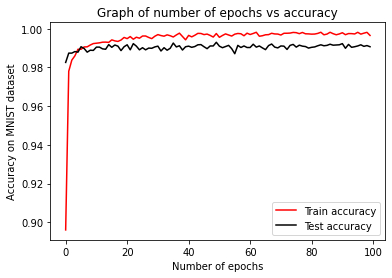

In [ ]:
plt.plot(history.history['accuracy'], "r")
plt.plot(history.history['val_accuracy'], "black")

plt.title('Graph of number of epochs vs accuracy')

plt.ylabel('Accuracy on MNIST dataset')
plt.xlabel('Number of epochs')

plt.legend(['Train accuracy', 'Test accuracy'])
plt.show()

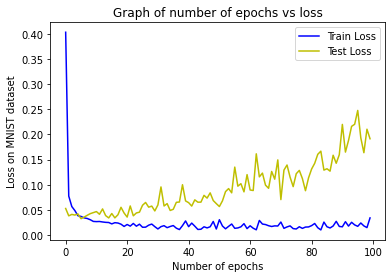

In [ ]:
plt.plot(history.history['loss'], "b")
plt.plot(history.history['val_loss'], "y")

plt.title('Graph of number of epochs vs loss')

plt.ylabel('Loss on MNIST dataset')
plt.xlabel('Number of epochs')

plt.legend(['Train Loss', 'Test Loss'])
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose= 2)

313/313 - 1s - loss: 0.1914 - accuracy: 0.9907 - 1s/epoch - 5ms/step


In [ ]:
print("Test Loss on the MNIST dataset:", test_loss)

Test Loss on the MNIST dataset: 0.19141586124897003


In [ ]:
print('Test accuracy of the MNIST datset:', test_accuracy*100)

Test accuracy of the MNIST datset: 99.07000064849854
